In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from yellowbrick.text import TSNEVisualizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
main = pd.read_csv("datasets/cleaned.csv").drop(columns="Unnamed: 0")
main.head()

,comments,description,duration,languages,main_speaker,name,num_speaker,related_talks,speaker_occupation,tags,...,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,max_rating,yr,month
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",...,10581,300,10704,4439,1174,209,24924,Inspiring,2006,6
1,265,With the same humor and humanity he exuded in ...,977,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",...,132,258,268,116,203,131,413,Funny,2006,6
2,124,New York Times columnist David Pogue takes aim...,1286,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",...,166,104,230,54,146,142,230,Funny,2006,6
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,35,Majora Carter,Majora Carter: Greening the ghetto,1,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",...,132,36,460,230,85,35,1070,Inspiring,2006,6
4,593,You've never seen data presented like this. Wi...,1190,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",...,4606,67,2542,3736,248,61,2893,Informative,2006,6


In [4]:
rf = RandomForestRegressor(random_state=42)

In [5]:
svr = LinearSVR(random_state=42, C=1.49)

In [7]:
transcript = main["transcript"]

In [8]:
y = main["views"]

In [9]:
main.columns

Index(['comments', 'description', 'duration', 'languages', 'main_speaker',
       'name', 'num_speaker', 'related_talks', 'speaker_occupation', 'tags',
       'title', 'url', 'views', 'transcript', 'Funny', 'Beautiful',
       'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative',
       'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK',
       'Obnoxious', 'Inspiring', 'max_rating', 'yr', 'month'],
      dtype='object')

In [31]:
rf_data = main.drop(columns=["description", "main_speaker", "name", "related_talks", "speaker_occupation", 
                            "tags", "title", "url", "transcript", "views"])
rf_data.columns

Index(['comments', 'duration', 'languages', 'num_speaker', 'Funny',
       'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
       'Informative', 'Fascinating', 'Unconvincing', 'Persuasive',
       'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring', 'max_rating', 'yr',
       'month'],
      dtype='object')

In [32]:
le = LabelEncoder()
rf_data["max_rating"] = le.fit_transform(rf_data["max_rating"])

C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\

C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pjd04\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Optimal number of features : 15


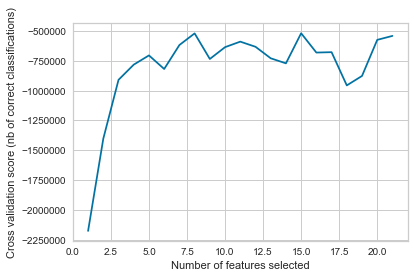

In [33]:
rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(3),
              scoring='neg_mean_absolute_error')
rfecv.fit(rf_data, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [34]:
rfecv.estimator_.feature_importances_ 

array([0.02272984, 0.03354083, 0.04824531, 0.01633916, 0.01779698,
       0.0251007 , 0.17848268, 0.26601379, 0.01192498, 0.0093917 ,
       0.01032374, 0.08853494, 0.01258471, 0.24622721, 0.01276344])

In [35]:
rfecv.ranking_ 

array([1, 2, 1, 7, 1, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 6])

In [36]:
rfecv_rankings = list(zip(rf_data.columns, rfecv.ranking_))

In [37]:
features = [item[0] for item in rfecv_rankings if item[1]==1]

In [38]:
features

['comments',
 'languages',
 'Funny',
 'Beautiful',
 'Courageous',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jaw-dropping',
 'OK',
 'Obnoxious',
 'Inspiring',
 'yr']

In [39]:
rf_data = rf_data[features]